# Problema 2: Chimenea de equilibrio

Primero corre el siguiente codigo, esto es solo para tener la opcion de esconder el codigo y poder tener un jupyter mas limpio. Podras apretar _Esconder/Mostrar contenido_ para esconder el codigo.

In [10]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Esconder/Mostrar contenido'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

hide_toggle()

### Perfecto! Ahora con el ejercicio...

Suponga que tiene una central hidraúlica que está funcionando en régimen permanente. Esta central se encuentra a 20 metros de altura de una turbina y la tubería que conecta la turbina con el estanque tiene un largo de 200 metros. El estanque está lleno de agua hasta 100 metros de altura. Se considera además que el embalse es de gran tamaño, está abierto a la atmósfera y la salida de la tubería después de pasar por la turbina también está abierta a la atmósfera. La potencia que genera la turbina se puede modelar con la siguiente ecuación de Bernoulli:





$$P=\eta \gamma Av\left(h_{e}+z_{e}-\frac{v^{2}}{2g}-64\frac{\mu L_{t}v}{\rho D^{2} 2g}\right)$$






Donde:
$h_{e}=\text{Altura del agua del estanque}$,
$z_{e}=\text{Altura de la base del estanque a la salida de la tubería}$,
$v=\text{Velocidad del fluido a la salida}$,
$A=\text{Área transversal de la tubería}$,
$L_{t}=\text{Largo tubería}$,
$D=\text{Diámetro tubería}$,
$\eta=\text{Eficiencia de la turbina}$
Se pide determinar el diámetro y velocidad necesarios para generar una potencia cercana a P=300 MW, máximo 300.2 MW.

**Nota:** Tiene dos parámetros libres. Si logras obtener la potencia pedida aparecerá un mensaje indicándolo. La eficiencia de la turbina será 90%.

In [5]:
from ipywidgets import widgets
import math

def potencia(D,v):
    mu=0.001; g=9.81; rho=1000; gamma=rho*g; Lt=200; ze=20; he=100; eta=0.9; #parametros arbitrarios
    A=4*math.pi*D**2
    hf=64*mu*Lt*v/(rho*D**2*2*g) #perdidas
    P=eta*gamma*A*v*(he+ze-(v**2/(2*g))-hf) #potencia

    return [P,hf]

lbl1=widgets.Label('Diámetro tubería [m]')
display(lbl1)
text1=widgets.Text()
display(text1)
lbl2=widgets.Label('Velocidad fluido [m/s]')
display(lbl2)
text2=widgets.Text()
display(text2)
btn=widgets.Button(description="Verificar")
display(btn)
lbl3=widgets.Label()
display(lbl3)
lbl4=widgets.Label()
display(lbl4)

def verificar(b):
    D=float(text1.value)
    v=float(text2.value)
    P, hf=potencia(D,v)
    P=P/1000000
    P=int(P*100)/100.0
    lbl3.value='Potencia= '+str(P)+' MW'
    if P>300 and P<300.2:
        lbl4.value='¡BIEN HECHO!'
    elif P>300.2:
        lbl4.value='Te pasaste :('
    elif P<300:
        lbl4.value='Aún falta potencia'
        
hide_toggle()

Label(value='Diámetro tubería [m]')

Text(value='')

Label(value='Velocidad fluido [m/s]')

Text(value='')

Button(description='Verificar', style=ButtonStyle())

Label(value='')

Label(value='')

Luego de determinar los parámetros anteriores, inesperadamente ocurre una falla que obliga a cerrar la compuerta que se encuentra a la salida de la turbina de forma instantánea. Como pudo observar en la parte teórica, esto genera cambios de presiones y movimiento de fluido que debe ser liberado. Suponga que la central tiene una chimenea simple de equilibrio en el tramo final de la galería de presión (tubería). En el peor de los casos se tendrán oscilaciones mantenidas de período $T_{o}$ y amplitud $Z_{o}$ dadas por las ecuaciones:
$$Z_{o}=Q_{o}\sqrt{\frac{L_{t}}{gA_{s}A_{L}}},~~~~T_{o}=2\pi \sqrt{\frac{L_{t}A_{s}}{gA_{t}}}$$

Se asumirá que el área antes de la chimenea y después de ella es la misma, por ende $A_{L}=A_{t}$ que viene determinada por el diámetro que se encontró anteriormente. Además, $L_{t}= 200 m$ igual que antes. A continuación se presenta un gráfico en el cual se pide ingresar la velocidad y diámetros encontrados anteriormente. El gráfico muestra la altura de la columna de agua de la chimenea de equilibrio, que tiene un altura inicial de 40 metros y presenta oscilaciones. Mediante un slider se puede variar el diámetro de la chimenea de equilibrio y ver cómo cambia el período y amplitud de las oscilaciones. 

Label(value='')

Ingrese diámetro tubería: 10
Ingrese velocidad: 10
Caudal: 12566.37 m^3/s


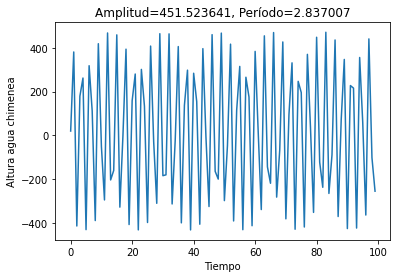

interactive(children=(FloatSlider(value=10.0, description='Diámetro: ', max=15.0, min=10.0), Output()), _dom_c…

In [8]:
# %matplotlib notebook

from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
import math

lbl4=widgets.Label()
display(lbl4)

D=float(input('Ingrese diámetro tubería: '))
v=float(input('Ingrese velocidad: '))
A=4*math.pi*D**2
Qo=A*v
Qo=int(Qo*100)/100.0
print('Caudal: '+str(Qo)+' m^3/s')


Dch=1
hinicial=20
A=4*math.pi*D**2
Qo=A*v
Lt=200; g=9.81; 
As=4*math.pi*Dch**2 #Area transversal chimenea
Zo=Qo*math.sqrt(Lt/(g*As*A)) #Amplitud sinuosoide altura chimenea
To=2*math.pi*math.sqrt((Lt*As)/(g*A)) #periodo sinusoide chimenea
x=np.arange(0,100,1)
altura_chimenea=hinicial+Zo*np.sin(2*math.pi*x/(To))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, altura_chimenea)
plt.title('Amplitud=%f, Período=%f' %(Zo,To))
plt.xlabel('Tiempo')
plt.ylabel('Altura agua chimenea')

def update_graf(Dch = 3.0):
    hinicial=40
    A=4*math.pi*D**2
    Qo=A*v
    Lt=200; g=9.81; 
    As=4*math.pi*Dch**2 #Area transversal chimenea
    Zo=Qo*math.sqrt(Lt/(g*As*A)) #Amplitud sinuosoide altura chimenea
    To=2*math.pi*math.sqrt((Lt*As)/(g*A)) #periodo sinusoide chimenea
    x=np.arange(0,100,1)
    altura_chimenea=hinicial+Zo*np.sin(2*math.pi*x/(To))
    line.set_ydata(altura_chimenea)
    plt.title('Amplitud=%f, Período=%f' %(Zo,To))
    fig.canvas.draw_idle()

interact(update_graf, Dch = widgets.FloatSlider(value=2,
                                               min=D,
                                               max=15,
                                               step=0.1,
                                          description='Diámetro: '));

